In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

C:\Users\ACER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
df.shape

(7588, 2)

In [6]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [9]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [10]:
#Changing the data type of Date column as Date using pandas command
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")


In [11]:
df.set_index('date',inplace = True)

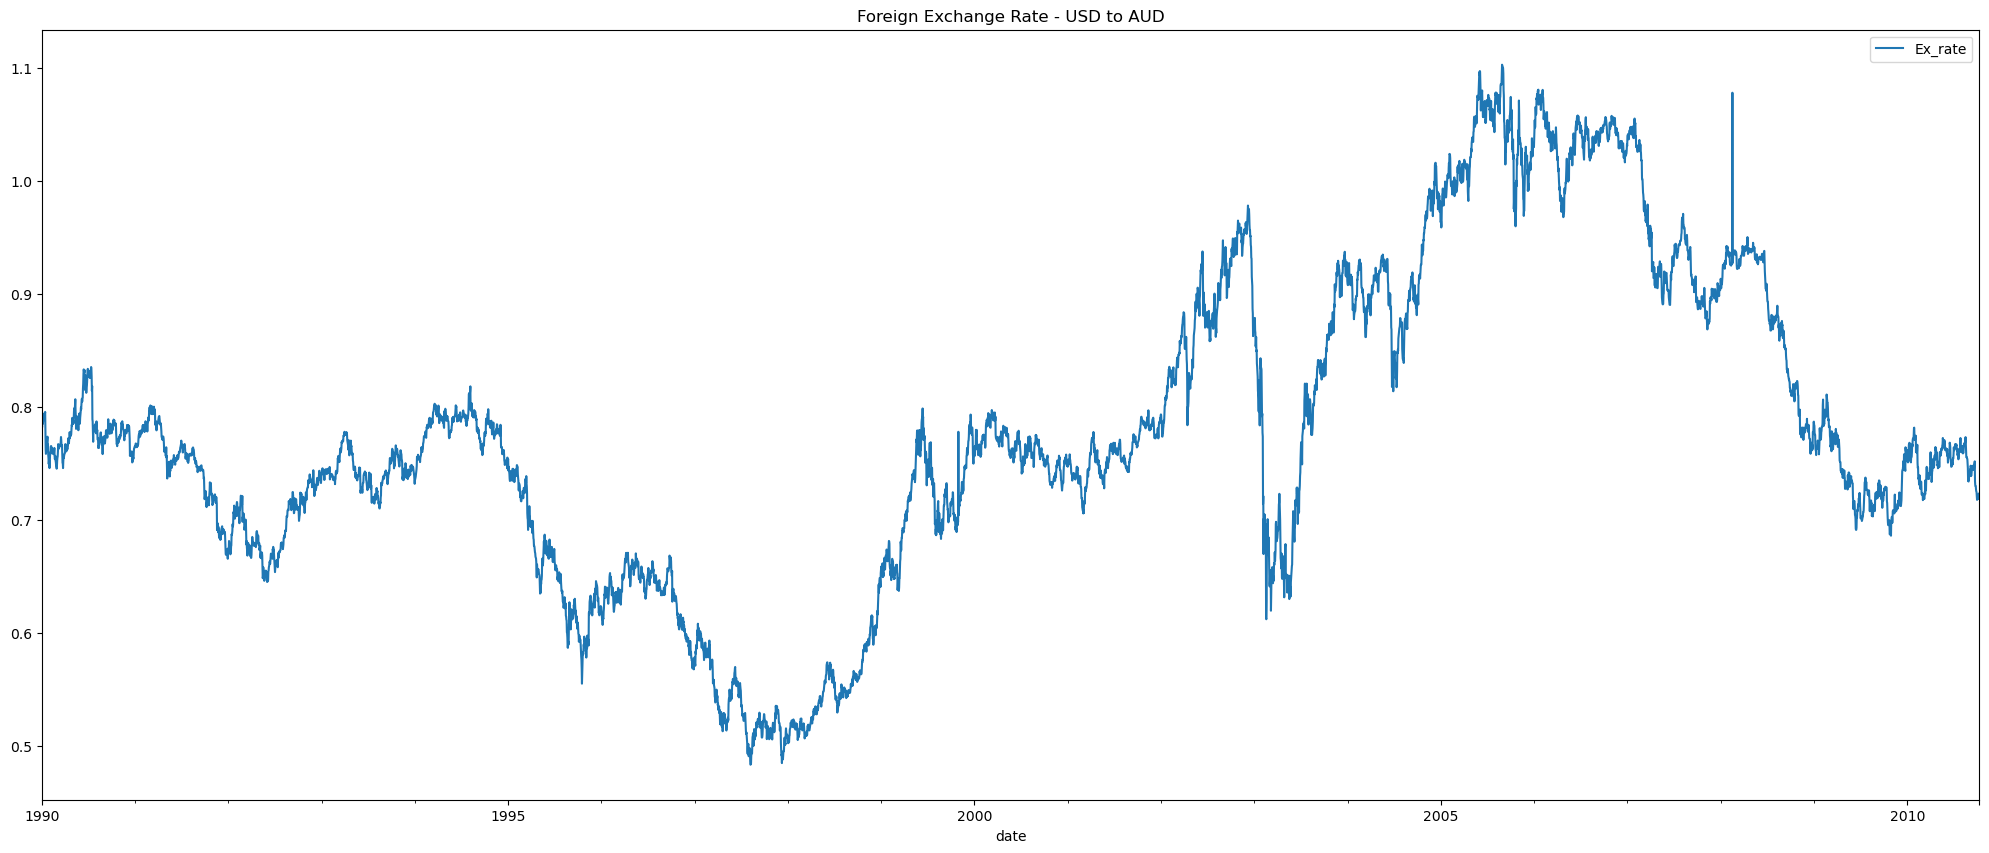

In [12]:
#Plotting the line graph to show the data trend in the dataset 

df.plot(figsize = (25,10))
plt.title('Foreign Exchange Rate - USD to AUD')
plt.savefig('Foreign Exchange Rate - USD to AUD.png')
plt.show()

In [13]:
print(df.isnull().sum())

Ex_rate    0
dtype: int64


In [14]:
#testing for straionarity
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result = adfuller(df['Ex_rate'])

In [16]:
test_result

(-1.664994180738078,
 0.44923273535982894,
 1,
 7586,
 {'1%': -3.4312123140180137,
  '5%': -2.861921078147796,
  '10%': -2.5669728434336108},
 -55835.06254628545)

In [17]:
#Ho = it is non_stationarity
#H1 = it is stationarity
 
def adfuller_test(Ex_rate):
    result = adfuller(Ex_rate)
    labels = ['ADF Test Statistic','p_value','#Lags Used','Number of observations used']
    for value,label in zip (result,labels):
        print(label+' : '+str(value))
    if result[1] <=0.05:
        print("reject nul hypothesis, Data is stationarity")
    else:
        print("Data is no stationarity")

In [18]:
adfuller_test(df['Ex_rate'])

ADF Test Statistic : -1.664994180738078
p_value : 0.44923273535982894
#Lags Used : 1
Number of observations used : 7586
Data is no stationarity


In [19]:
df1 = df.diff().dropna()
print('Count of weekly First Difference',df1.shape[0])
df1.head()

Count of weekly First Difference 7587


,Ex_rate
date,
1990-01-02,-0.0037
1990-01-03,0.0049
1990-01-04,-0.0007
1990-01-05,-0.0011
1990-01-06,0.0017


In [20]:
adfuller_test(df1)

ADF Test Statistic : -99.39343120118623
p_value : 0.0
#Lags Used : 0
Number of observations used : 7586
reject nul hypothesis, Data is stationarity


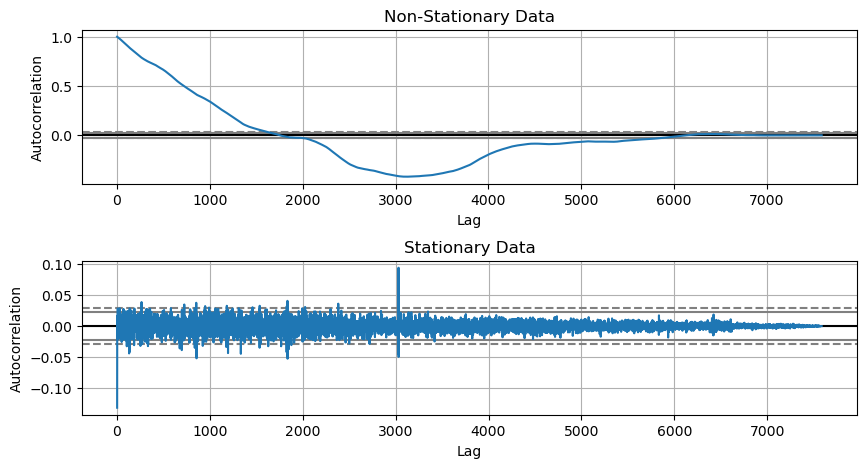

In [21]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1, ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

In [22]:
model = auto_arima(df , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=1.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=1.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=0.56 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=1.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=1.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=2.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=1.65 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.315, Time=1.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 14.447 sec

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Thu, 12 Sep 2024   AIC                         -56104.319
Time:                        01:05:28   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865011.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
model = ARIMA(df , order = (5,1,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 2)   Log Likelihood               28055.115
Date:                Thu, 12 Sep 2024   AIC                         -56094.231
Time:                        01:05:32   BIC                         -56038.757
Sample:                    01-01-1990   HQIC                        -56075.193
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0623      1.268     -0.049      0.961      -2.547       2.422
ar.L2          0.0060      1.456      0.004      0.997      -2.848       2.860
ar.L3         -0.0100      0.190     -0.053      0.958      -0.383       0.363
ar.L4          0.0018      0.017      0.107      0.915      -0.032       0.035
ar.L5          0.0060      0.016      0.380      0.704      -0.025       0.037
ma.L1         -0.0634      1.268     -0.050      0.960      -2.548       2.421
ma.L2          0.0064      1.500      0.004      0.997      -2.934       2.947
sigma2      3.583e-05   1.01e-07    355.402      0.000    3.56e-05     3.6e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):           2911383.47
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.27e+14. Standard errors may be unstable.
"""

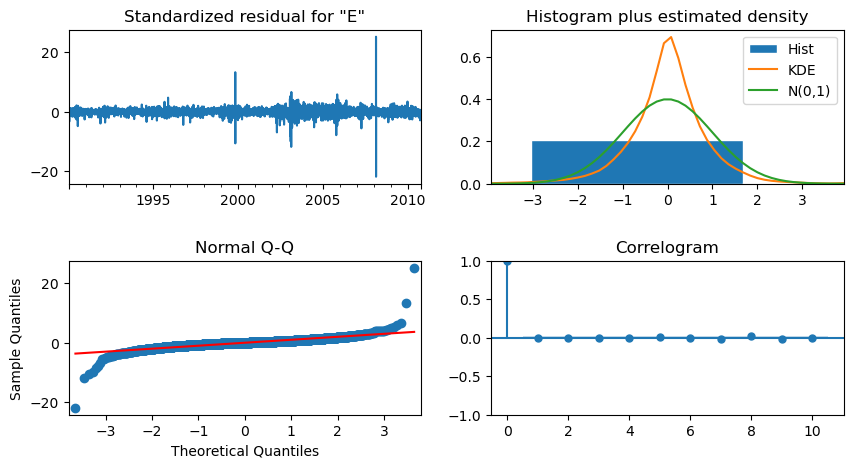

In [25]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

In [26]:
predictions = result.predict(typ = 'levels')

In [27]:
predictions

1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.782268
1990-01-04    0.786063
1990-01-05    0.786143
                ...   
2010-10-06    0.718810
2010-10-07    0.718518
2010-10-08    0.721428
2010-10-09    0.723045
2010-10-10    0.721093
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [28]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df['Ex_rate'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df['Ex_rate'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df['Ex_rate'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df['Ex_rate'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df['Ex_rate'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 99.37 % 

Mean Squared Error :  0.00011725640559041042 

Mean Absolute Error :  0.0037931087622466134 

Root Mean Squared Error :  0.01082849969249713 

Mean Absolute Percentage Error : 0.49 %


In [29]:
Final_data = pd.concat([df,df1,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (USD to AUD).csv')
Final_data.head()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
1990-01-01,0.7855,NaN,0.000000
1990-01-02,0.7818,-0.0037,0.785500
1990-01-03,0.7867,0.0049,0.782268
1990-01-04,0.7860,-0.0007,0.786063
1990-01-05,0.7849,-0.0011,0.786143


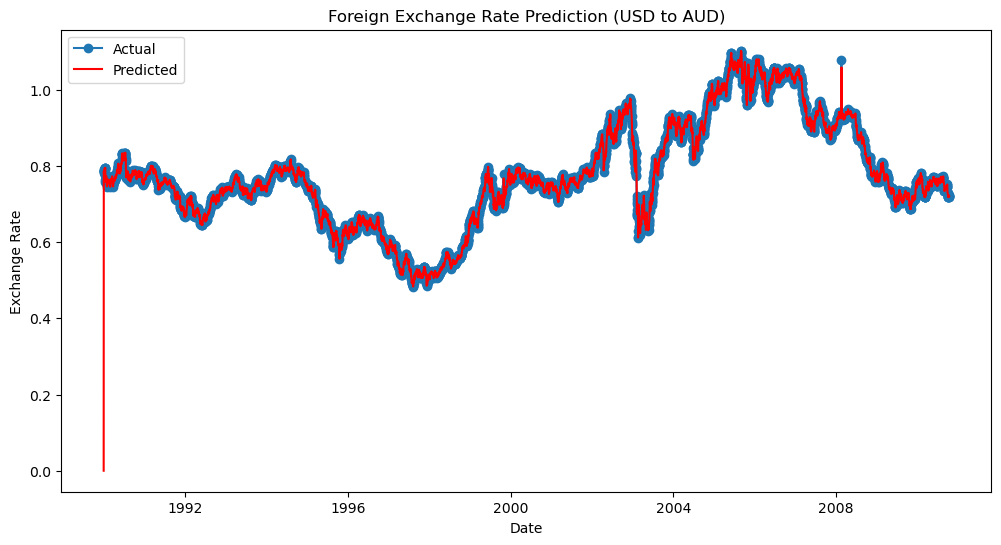

In [35]:
import matplotlib.pyplot as plt

# Plot actual data and predictions
plt.rcParams['figure.figsize'] = (12, 6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction (USD to AUD)', xlabel='Date', ylabel='Exchange Rate')
ax.plot(df.index, df['Ex_rate'], label='Actual', marker='o')
ax.plot(predictions.index, predictions, label='Predicted', color='red')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Actual_vs_Predicted_Exchange_Rate.png')
plt.show()

